# Data Science for Networks

In [1]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def _date_parser(x):
    return pd.to_datetime(x, yearfirst=True, format='%Y-%m-%d')

data_dir = 'historical-prices'
files = os.listdir(data_dir)
files.sort()
len(files)

502

Retain only stocks whose series are complete between 2007 and 2017.

In [3]:
desired_size = 2769
stock_series = []
for file in files:
    df = pd.read_csv(os.path.join(data_dir, file), header=0, index_col=0, parse_dates=True, 
                     date_parser=_date_parser)    
    s = df.loc['2007':'2017', 'Close']
    s.name = file.split('_')[0]
    
    if s.size == desired_size:
        stock_series += [s]

Find relative difference with respect to the previous day.

In [4]:
diffs = [s.diff() for s in stock_series]
pdiffs = [s.diff() / s.shift(1) for s in stock_series]
pdiffs = [s[1:] for s in pdiffs]
# print(stock_series[0].iloc[:5], diffs[0].iloc[:5], pdiffs[0].iloc[:5])
pdiffs = pdiffs[:-1]
# pdiffs

[Date
 2007-01-04    0.045115
 2007-01-05   -0.009347
 2007-01-08   -0.006176
 2007-01-09   -0.000518
 2007-01-10    0.017789
 2007-01-11    0.038520
 2007-01-12   -0.006373
 2007-01-16    0.018911
 2007-01-17   -0.053422
 2007-01-18   -0.013981
 2007-01-19    0.007954
 2007-01-22   -0.021616
 2007-01-23   -0.065930
 2007-01-24    0.001502
 2007-01-25    0.009560
 2007-01-26   -0.032120
 2007-01-29    0.044120
 2007-01-30   -0.024435
 2007-01-31    0.054237
 2007-02-01    0.035906
 2007-02-02   -0.000172
 2007-02-05    0.007416
 2007-02-06   -0.001712
 2007-02-07   -0.003944
 2007-02-08    0.021178
 2007-02-09   -0.019727
 2007-02-12    0.012728
 2007-02-13    0.004925
 2007-02-14   -0.023323
 2007-02-15   -0.006749
                 ...   
 2017-11-16    0.010384
 2017-11-17   -0.006082
 2017-11-20    0.006330
 2017-11-21    0.020130
 2017-11-22    0.000206
 2017-11-24   -0.002055
 2017-11-27   -0.002883
 2017-11-28    0.016522
 2017-11-29    0.000609
 2017-11-30    0.025178
 2017-12-0

Create sparse Dictionary Of Keys (see also scipy.dox_matrix)

In [5]:
import sparse

r = c = len(pdiffs)
t = pdiffs[0].size
r, c, t

(443, 443, 2768)

In [6]:
stock_to_id = {}
id_to_stock = {}
for stock in pdiffs:
    stock_to_id[stock.name] = len(stock_to_id)
    id_to_stock[len(stock_to_id) - 1] = stock.name
# print(stock_to_id, id_to_stock)

In [7]:
'''
X = sparse.DOK(shape=(len(filtered_users), len(filtered_tags), len(time)))
for user, tag, ts in filtered_mentions:
    X[filtered_users[user], filtered_tags[tag], time[ts]] = filtered_mentions[user, tag, ts]
X = X.to_coo()
'''

X = sparse.DOK(shape=(r, c, 10))

for time in range(10):
    print(time)
    for i, item_i in enumerate(pdiffs):
        for j, item_j in enumerate(pdiffs):
            # print(i, j)
            if i == j:
                X[i, j, time] = 0
                continue
            
            if item_i.iloc[time] > 0 and item_j.iloc[time] > 0:
                X[i, j, time] = 1
            else:
                X[i, j, time] = 0

XCOO = X.to_coo()

0
1
2
3
4
5
6
7
8
9


In [8]:
XCOO.shape

(443, 443, 10)

In [11]:
import tensorly as tl
tl.set_backend('sparse')

import tensorly.contrib.sparse as tlsp
from tensorly.contrib.sparse.decomposition import parafac
#from tensorly.sparse.decomposition import parafac

X = tlsp.tensor(XCOO)
X

<COO: shape=(443, 443, 10), dtype=float64, nnz=594456, fill_value=0.0>

In [13]:
A, B, C = parafac(X, 5)
A.shape, B.shape, C.shape

((443, 5), (443, 5), (10, 5))

116 DHR 29.563064212000995
DHR 424 WELL 29.54634400995975
WELL 441 ZBH 29.47441852645973
ZBH 90 CMCSA 29.464632040779744
CMCSA 320 PFE 29.464632040779744
PFE ---
295 NFX 0.0006080285982772589
NFX 286 MU 0.0005695754082022597
MU 185 GT 0.0004412498302841359
GT 60 BHGE 0.0004027984042258801
BHGE 298 NKTR -0.000991153389755828
NKTR 


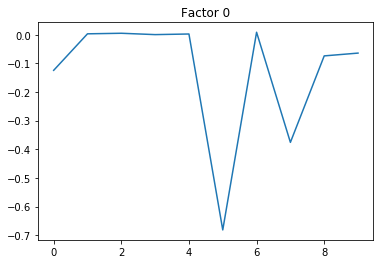



74 CBRE 0.4321240202914957
CBRE 270 MGM 0.4321240202914957
MGM 242 K 0.4321240202914957
K 401 UHS 0.410096701656426
UHS 296 NI 0.4043155902005177
NI ---
150 EW 0.0711873720895145
EW 197 HOLX 0.07073147822579334
HOLX 215 INTU 0.07070942950732073
INTU 188 HAS 0.07070942950732073
HAS 240 KSS 0.07070942950732073
KSS 


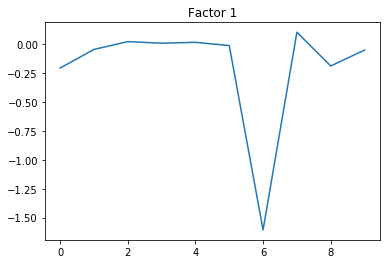



246 LH 9.982756566677724
LH 194 HFC 9.89979970751934
HFC 379 SYMC 9.89852663600687
SYMC 291 NDAQ 9.851470395102563
NDAQ 209 ICE 9.847217819866863
ICE ---
246 LH 0.08034818977056603
LH 194 HFC 0.07968048508122033
HFC 379 SYMC 0.07967024433144394
SYMC 291 NDAQ 0.07929149936555853
NDAQ 209 ICE 0.07925725659194546
ICE 


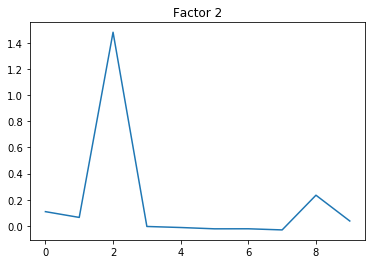



54 BA 8.496127794674024
BA 276 MNST 8.452833453312417
MNST 442 ZION 8.44622969707857
ZION 236 KMB 8.44622969707857
KMB 426 WHR 8.43059630796041
WHR ---
54 BA 0.08190831627902642
BA 276 MNST 0.08149091964377778
MNST 442 ZION 0.0814272568256148
ZION 236 KMB 0.0814272568256148
KMB 426 WHR 0.0812765181124823
WHR 


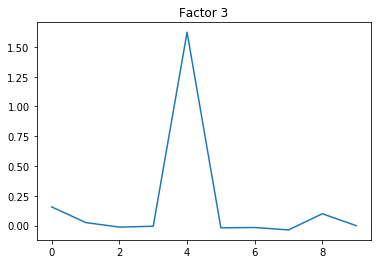



306 NVDA 0.06141635985137423
NVDA 195 HIG 0.054761812533810655
HIG 117 DISCA 0.05230013178810103
DISCA 63 BK 0.05230013178810102
BK 248 LLL 0.049155591934995455
LLL ---
306 NVDA 0.0031300403504793454
NVDA 195 HIG 0.0027908980264662975
HIG 63 BK 0.0026654528965304306
BK 117 DISCA 0.0026654528965304306
DISCA 248 LLL 0.002505192763664463
LLL 


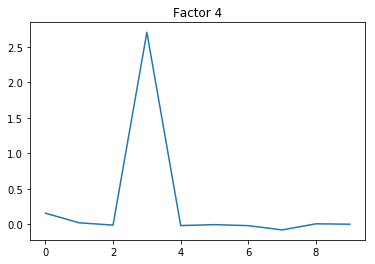

In [27]:
for factor in range(5):
    plt.plot(list(C[:, factor]))
    plt.title('Factor {}'.format(factor))
    # print(A[:20, factor].data)
    # print(B[:20, factor].data)
    for a in A[:, factor].todense().argsort()[::-1][:5]:
        print(a,id_to_stock[a],A[a,factor])
        print(id_to_stock[a], end=' ')
        # print()
        # print()
    print('---')
    for b in B[:, factor].todense().argsort()[::-1][:5]:
        print(b,id_to_stock[b],B[b,factor])
        print(id_to_stock[b], end=' ')
        # print()
        # print()
    print()
    plt.show()
    print()
    print()